# Importing the libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Importing dataset

In [72]:
mshrm = pd.read_csv('mushroom.csv')
mshrm.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### Observations-:
the dataset contains categories in it and it enables us to get that this the classification problem.

In [73]:
mshrm.shape

(8124, 23)

In [74]:
mshrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [75]:
mshrm.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [76]:
mshrm.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# EDA


## Univariate Analysis


<AxesSubplot:xlabel='class', ylabel='count'>

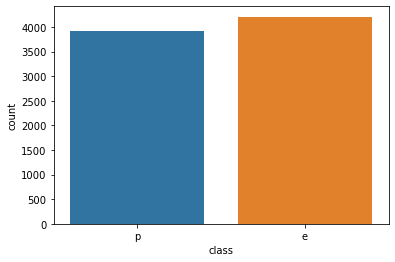

In [77]:
sns.countplot(mshrm['class'])

# Multivariate Analysis

<Figure size 1008x432 with 0 Axes>

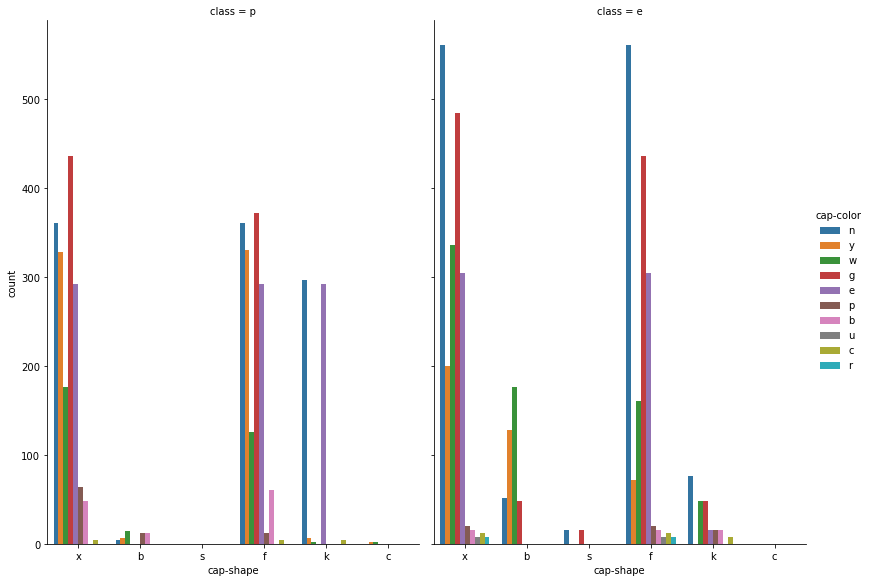

In [78]:
plt.figure(figsize = (14,6))
g = sns.catplot(x = 'cap-shape', hue = 'cap-color',
                col='class', data = mshrm, 
                kind='count', height = 8,aspect = .7)

#### Observation-:
we can see in the above graph that the ['r','n','y','e'] colured mushrooms with 'x' cap-shape with 'p' i.e. poisonous class are counts to more in number but at the same time it also counts almost equal in 'e' i.e. edible class.



but, the 'w' coloured are more in edible and less in poisonous class
and vice-cersa for the 'r' coloured and 'k' shaped mushrooms.



the 's' cap-shaped mushrooms are very less counts to edible class and 0 counts to poisonous, and the 'c' cap-shaped mushrooms no where counts to any class. Therefore, it is recommended that those categories comes in not-recommended.



#### Inference-:
1. 'w' coloured and 'b' shaped mushrooms are highly recommended for eating.
2. 'r' coloured 'k' shaped mushrooms are poisonous

<Figure size 1008x432 with 0 Axes>

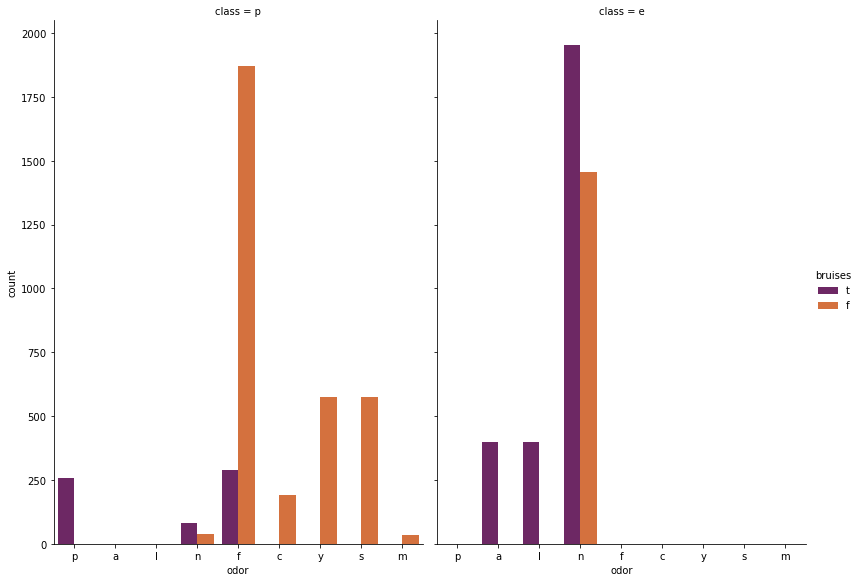

In [79]:
 plt.figure (figsize = (14,6))
g = sns.catplot(x='odor', hue='bruises', col='class',
                data = mshrm, kind='count',
                height = 8, aspect = .7, palette = 'inferno')

#### Observation-:
1. 'n' odour category and bruised mushrooms are highly recommended for eating.
2. 'f' odour category with no bruises mushrooms are poisonous.








# Data Preprocessing

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mshrm = mshrm.apply(LabelEncoder().fit_transform)
mshrm.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### Definening X and Y


In [81]:
x = mshrm.iloc[:,1:]
x.head(2)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1


In [82]:
y = mshrm['class']
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

### Training the Model

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 45 )

In [84]:
# decision tree model
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [85]:
dtc.score(x_train, y_train)

1.0

In [86]:
pred = dtc.predict(x_test)
pred

array([0, 0, 1, ..., 1, 1, 0])

In [87]:
accuracy_score(y_test, pred)

1.0

### Checking the Best Model

In [88]:
# checking the best model
model = [DecisionTreeClassifier(),SVC(),SVC(kernel = 'poly'),SVC(kernel='linear'),
         KNeighborsClassifier(),GaussianNB(),RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('Accuracy score of',m,'is: ')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    cv = cross_val_score(m,x,y,cv = 5)
    print(cv)
    print('cross-validation mean is: ', cv.mean())
    print('\n')

Accuracy score of DecisionTreeClassifier() is: 
1.0
[[1255    0]
 [   0 1183]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       1.00      1.00      1.00      1183

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

[0.88184615 1.         0.99261538 1.         0.65517241]
cross-validation mean is:  0.9059267904509284


Accuracy score of SVC() is: 
0.9909762100082035
[[1255    0]
 [  22 1161]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1255
           1       1.00      0.98      0.99      1183

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438

[0.81292308 0.99507692 0.89907692 1.         0.49938424]
cross-validation mean is:  0.8

#### the best model
#### our best model is Decision Tree Classifier

## Saving the Model

In [89]:
import joblib

In [91]:
joblib.dump(dtc, 'dtcmshrmfile.obj')

['dtcmshrmfile.obj']